In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

--- Period of 6.0 min ---
a: [ 51.8320503  -10.76019303   0.22009406   0.94810391]
b: [  0.         -13.44356501   0.39997339   0.12584361]
Phases: [0.6749831465284482, 0.5030518315831364, 1.438835788759651]
Dpl: [1.0774175372778599e-06, 1.9397440552192393e-06, 2.3710867049469543e-07]
Gammas: [0.8114498397416677, 0.021513493299658668, 0.045070191897478205]
Dtf: [1.124493739068172e-05, 3.330555828737907e-08, 5.109483931233837e-08]


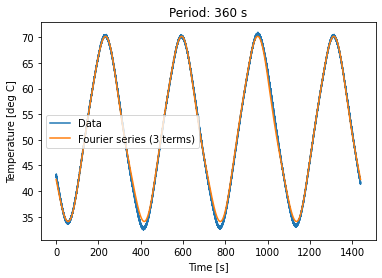

--- Period of 2.0 min ---
a: [ 5.27841298e+01  2.44653188e+00 -1.72429007e-03 -2.48682034e-02]
b: [ 0.         -0.31753477  0.0784695   0.05011385]
Phases: [-1.4417280812897844, -0.0219704807418295, -0.46063042516688973]
Dpl: [7.084748507576384e-07, 0.0030507880287809525, 6.940422562896457e-06]
Gammas: [0.1162570962963087, 0.003698680676015603, 0.002636338433022002]
Dtf: [3.1799941359700555e-07, 4.696230051533831e-08, 4.1759710835883127e-08]


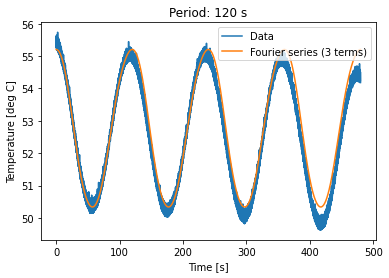

--- Period of 16.0 min ---
a: [ 63.00205746 -31.57580609   1.56659509  -1.9116208 ]
b: [0.00000000e+00 1.98508945e+01 6.57485937e+00 3.61600568e-03]
Phases: [-1.009559255661535, 0.23390904253225986, -1.5689047375351461]
Dpl: [1.806082301863447e-07, 3.36439627898023e-06, 7.478388409127102e-08]
Gammas: [1.7575944579302647, 0.3185065886640053, 0.0900831689802639]
Dtf: [5.787966227038287e-07, 1.40625472827505e-07, 3.177174514726224e-08]


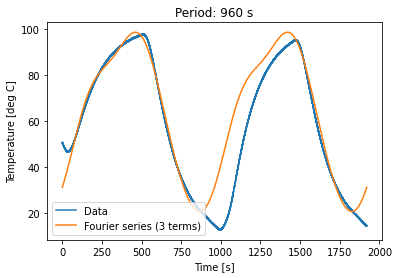

--- Period of 8.0 min ---
a: [ 51.14976969 -26.75617585   0.86425979   1.31089627]
b: [ 0.         -8.89171128 -0.0351809  -1.98617384]
Phases: [1.2499547199169376, -1.5301123945946289, -0.5833805612608489]
Dpl: [2.356365201359631e-07, 1.57247770208033e-07, 1.081750872546519e-06]
Gammas: [1.3286559423981714, 0.04076101183849896, 0.11214431925430285]
Dtf: [4.559122312520595e-06, 3.595201754085814e-08, 7.690400601117761e-08]


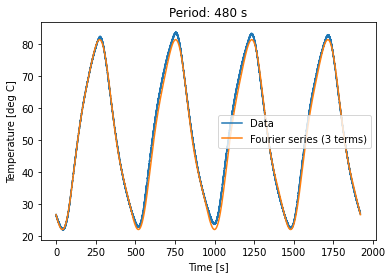

--- Period of 4.0 min ---
a: [ 5.13261305e+01  2.59205839e-01 -4.56511066e-02  1.64846491e-01]
b: [ 0.         -9.39257314  0.06916397  0.21918036]
Phases: [-0.02758989075317242, -0.5834020638564121, 0.6448464894077844]
Dpl: [0.0009673000186022389, 2.1633422665838216e-06, 1.7707142326328414e-06]
Gammas: [0.4427830945742732, 0.0039052254542168707, 0.012923841505390199]
Dtf: [1.1094100731064178e-06, 2.3943584833826518e-08, 3.893551801711705e-08]


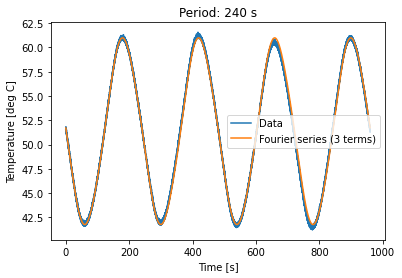

--- Period of 1.0 min ---
a: [5.46673945e+01 9.94701647e-01 5.09442722e-02 1.23424726e-02]
b: [0.         0.69935608 0.0450029  0.03479006]
Phases: [0.9580054030797792, 0.8472425631735557, 0.34091799301705533]
Dpl: [3.2091146426820846e-06, 4.1030387469874245e-06, 2.5340857277666818e-05]
Gammas: [0.057300214066337354, 0.003203239225280385, 0.0017395578169293582]
Dtf: [3.602100751556025e-07, 8.927993715095052e-08, 7.294738582444129e-08]


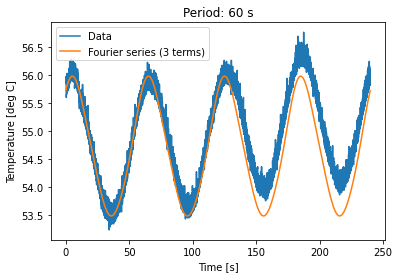

--- Summary D calculation ---


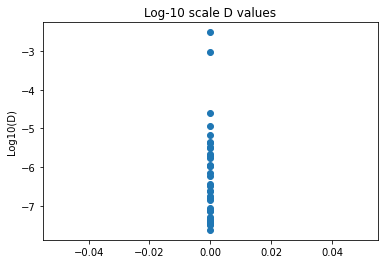

In [38]:
# Task 2.5 a)

nmax = 3
ds = []

for file in os.listdir():
    filename = os.fsdecode(file)
    if filename.endswith(".txt") and filename[13] != 'b':
        time, temp = np.loadtxt(filename, delimiter='\t', skiprows=3).transpose()
        time = 0.1*time
        tau = int(filename[8])*60 if filename[9] == 'm' else int(filename[8:10])*60

        a = np.array([])
        b = np.array([])

        for n in range(nmax+1):
            if n == 0:
                a = np.append(a, 0.1/tau * sum([temp[i] for i in range(tau*10)]))
                b = np.append(b, 0)
                continue
            a = np.append(a, 0.2/tau * sum([temp[i]*np.cos(2*np.pi*n*time[i]/tau) for i in range(tau*10)]))
            b = np.append(b, 0.2/tau * sum([temp[i]*np.sin(2*np.pi*n*time[i]/tau) for i in range(tau*10)]))
        
        print(f"--- Period of {tau/60} min ---")
        print(f"a: {a}")
        print(f"b: {b}")
        phases = [np.arctan(a[i]/b[i]) for i in range(1, nmax+1)]
        print(f"Phases: {phases}")
        dpl = [np.pi/tau * 0.0075**2 / (phase)**2 for phase in phases]
        print(f"Dpl: {dpl}")
        gammas = [np.sqrt(a[i]**2 + b[i]**2)/(100*(1-np.cos(np.pi*n))/(np.pi*n)) for i in range(1, nmax+1)]
        print(f"Gammas: {gammas}")
        dtf = [np.pi/tau * 0.0075**2 / (np.log(gamma))**2 for gamma in gammas]
        print(f"Dtf: {dtf}")

        ds += dpl
        ds += dtf


        fs = lambda x: sum([a[n]*np.cos(2*np.pi*n*x/tau) + b[n]*np.sin(2*np.pi*n*x/tau) for n in range(nmax+1)])
        temp_fourier = fs(time)

        plt.title(f"Period: {tau} s")
        plt.plot(time, temp, label="Data")
        plt.plot(time, temp_fourier, label=f"Fourier series ({nmax} terms)")
        plt.xlabel("Time [s]")
        plt.ylabel("Temperature [deg C]")
        plt.legend()
        #plt.savefig(f"fourier_{tau}s.png", dpi=1000)
        plt.show()

print("--- Summary D calculation ---")
plt.title("Log-10 scale D values")
plt.plot(np.zeros(len(ds)), np.log10(np.array(ds)), 'o')
plt.ylabel("Log10(D)")
plt.show()